In [1]:
# load data 
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/processed/NIFTY_500_daily.csv')

In [4]:
import sys
sys.path.append('../src')


In [14]:
from utils import *

adf_result = adf_test(df['log_return'])
print(f"ADF Statistic: {adf_result['ADF Statistic']}")
print(f"p-value: {adf_result['p-value']}")
if adf_result['p-value'] < 0.05:
    print("The return series is stationary.")
else:
    print("The return series is NOT stationary.")


ADF Statistic: -13.242786135026671
p-value: 9.099811883069367e-25
The return series is stationary.


In [16]:
from garch_model import *
garch_fit = fit_garch_model(df['log_return'])
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8251.16
Distribution:                  Normal   AIC:                          -16494.3
Method:            Maximum Likelihood   BIC:                          -16471.0
                                        No. Observations:                 2504
Date:                Mon, Jul 28 2025   Df Residuals:                     2503
Time:                        11:21:15   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.7045e-04  1.914e-04      4.549  5.402e-06 [4.

c:\Users\ajith\anaconda3\envs\venv\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001083. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [17]:
resid = garch_fit.std_resid.dropna()

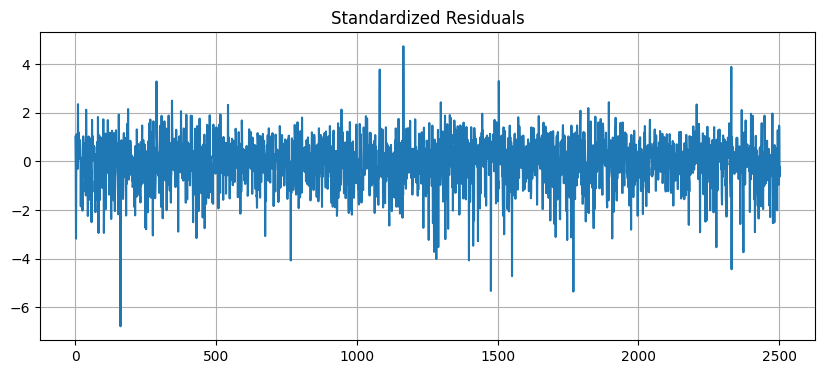

In [18]:
# Residual plot
plt.figure(figsize=(10, 4))
plt.title("Standardized Residuals")
plt.plot(resid)
plt.grid(True)
plt.show()

In [19]:
# Ljung-Box test
print("Ljung-Box Test on Residuals:")
print(acorr_ljungbox(resid, lags=[10], return_df=True))

print("\nLjung-Box Test on Squared Residuals:")
print(acorr_ljungbox(resid**2, lags=[10], return_df=True))

Ljung-Box Test on Residuals:
      lb_stat  lb_pvalue
10  24.834145   0.005669

Ljung-Box Test on Squared Residuals:
     lb_stat  lb_pvalue
10  8.932343   0.538536


In [22]:
# 5. Forecast volatility
forecast_horizon = 5
forecast = garch_fit.forecast(horizon=forecast_horizon)
volatility_forecast = forecast.variance.iloc[-1]
print(f"\n{forecast_horizon}-Step Ahead Volatility Forecast:")
print(volatility_forecast)


5-Step Ahead Volatility Forecast:
h.1    0.000070
h.2    0.000074
h.3    0.000077
h.4    0.000080
h.5    0.000083
Name: 2503, dtype: float64


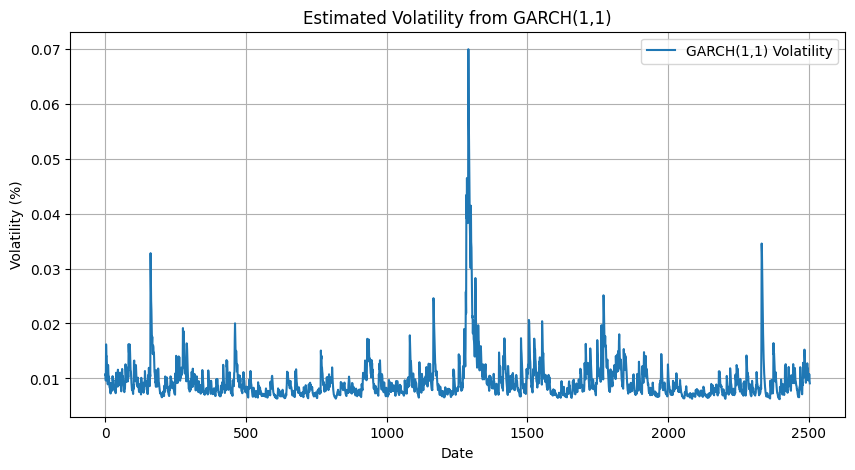

In [23]:
df["GARCH_volatility"] = garch_fit.conditional_volatility

plt.figure(figsize=(10, 5))
plt.plot(df["GARCH_volatility"], label="GARCH(1,1) Volatility")
plt.title("Estimated Volatility from GARCH(1,1)")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
df.to_csv('../data/processed/NIFTY_500_with_garch_volatility.csv', index=False)
print("GARCH volatility added to DataFrame and saved to CSV.")

GARCH volatility added to DataFrame and saved to CSV.
